# Setup Python environment
Import tensorflow, keras, matplotlib and numby

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb

# Prepare and visualize data
Import CIFAR10 dataset from Kera's library

In [2]:
(x_train, y_train),(x_test, y_test) = keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 44s 0us/step


Visualize Dataset

In [3]:
print("Length of train dataset: " + str(len(x_train)) + "\nLength of test dataset: "  + str(len(x_test)))

Length of train dataset: 50000
Length of test dataset: 10000


In [5]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [6]:
y_train.shape

(50000, 1)

In [12]:
y_train[:25]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1],
       [2],
       [7],
       [8],
       [3],
       [4],
       [7],
       [7],
       [2],
       [9],
       [9],
       [9],
       [3],
       [2],
       [6],
       [4],
       [3],
       [6],
       [6],
       [2]], dtype=uint8)

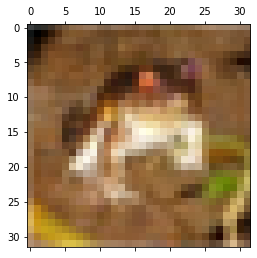

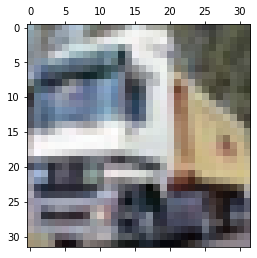

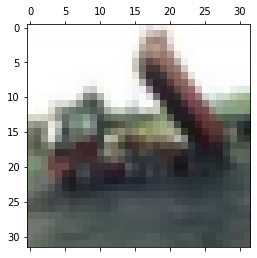

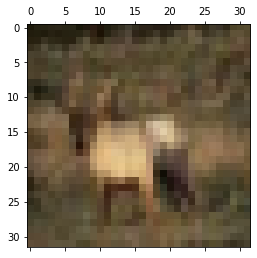

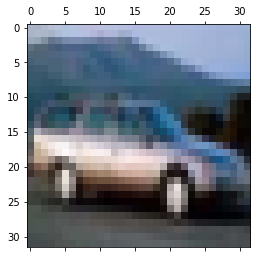

In [16]:
plt.matshow(x_train[0])
plt.matshow(x_train[1])
plt.matshow(x_train[2])
plt.matshow(x_train[3])
plt.matshow(x_train[4])

In [32]:
classifications = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
print ("In order of apperance, the first 5 elements are : " + classifications[y_train[0][0]]  + "," 
       + classifications[y_train[1][0]]+ ", "  + classifications[y_train[2][0]] + ", " 
       + classifications[y_train[3][0]] + ", " + classifications[y_train[4][0]])

In order of apperance, the first 5 elements are : frog,truck, truck, deer, automobile
